Epoch:   200 	 Cost:   0.09021 	 W:0.1863 	 b: 1.262
Epoch:   400 	 Cost:    0.0851 	 W:0.2004 	 b: 1.162
Epoch:   600 	 Cost:   0.08195 	 W:0.2114 	 b: 1.084
Epoch:   800 	 Cost:   0.08002 	 W:0.2201 	 b: 1.022
Epoch:  1000 	 Cost:   0.07883 	 W:0.2269 	 b:0.9741
Epoch:  1200 	 Cost:    0.0781 	 W:0.2322 	 b:0.9363
Epoch:  1400 	 Cost:   0.07765 	 W:0.2364 	 b:0.9066
Epoch:  1600 	 Cost:   0.07737 	 W:0.2397 	 b:0.8834
Epoch:  1800 	 Cost:    0.0772 	 W:0.2423 	 b:0.8651
Epoch:  2000 	 Cost:    0.0771 	 W:0.2443 	 b:0.8508
Optimization Finished!
Final training cost: 0.07709642 W: 0.24429607 b: 0.85083044 



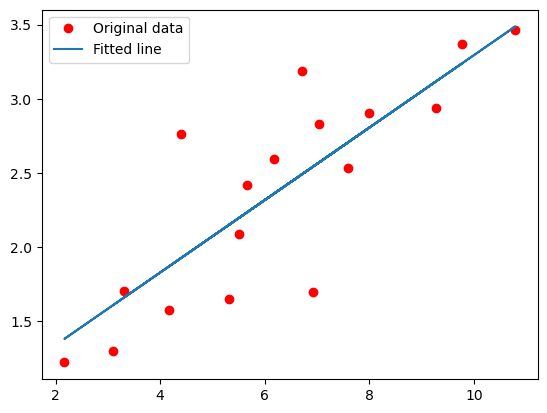

Final testing cost: 0.07996404
Absolute mean square loss difference: 0.0028676242


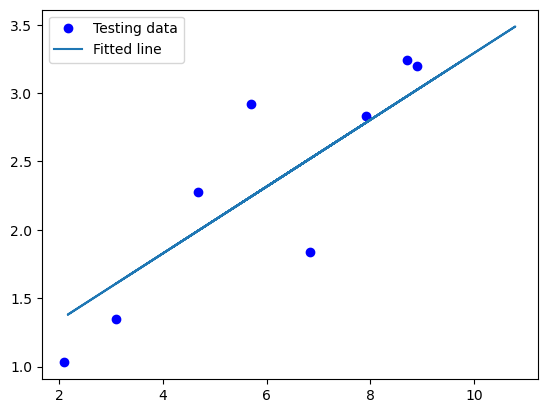

In [6]:
# Gradient Descent là thuật toán lặp tối ưu (iteractive optimization algorithm) được sử dụng trong machine learning để tìm kết quả tốt nhất (minima of a curve)
# Import các thư viện và modules cần thiết
import tensorflow.compat.v1 as tf # xây dựng, huấn luyện và triển khai các mô hình học máy
import numpy as np # xử lý mảng và ma trận
import matplotlib.pyplot as plt # vẽ đồ thị và biểu đổ

# Tắt eager execution để sử dụng TensorFlow 1.x
tf.compat.v1.disable_eager_execution()

# Các tham số của mô hình sẽ được tối ưu hoá trong quá trình huấn luyện
learning_rate = 0.01 # quy định tốc độ mà mô hình sẽ cập nhật các trọng số
training_epochs = 2000 #  Số lần mô hình sẽ duyệt qua toàn bộ dữ liệu huấn luyện
display_step = 200 #  Số lượng epochs mà sau đó thông tin về quá trình huấn luyện sẽ được hiển thị

# Dữ liệu huấn luyện
train_X = np.asarray([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 
                      2.167, 7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1])
train_y = np.asarray([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 
                      1.221, 2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3])
n_samples = train_X.shape[0]

# Dữ liệu kiểm thử
test_X = np.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])

# Khai báo các placeholders cho feature và target vectors
# Placeholder:một lời hứa để cung cấp một giá trị sau này
X = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# Khai báo trọng số và sai số của mô hình
# Các tham số mô hình sẽ được tối ưu hoá trong quá trình huấn luyện.
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

# Xây dựng mô hình tuyến tính
linear_model = W * X + b

# Hàm mất mát (Mean squared error): đánh giá sự khác biệt giữa đầu ra dự 
đoán và đầu ra thực tế
cost = tf.reduce_sum(tf.square(linear_model - y)) / (2 * n_samples)

# Thuật toán Gradient Descent để tối ưu hóa hàm mất mát
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Khởi tạo các biến mô hình
init = tf.global_variables_initializer()

# Bắt đầu phiên làm việc TensorFlow
with tf.Session() as sess:
    # Khởi tạo các biến trong phiên làm việc hiện tại
    sess.run(init)
    
    # Huấn luyện mô hình trên toàn bộ dữ liệu huấn luyện
    for epoch in range(training_epochs):
        # Thực hiện một bước Gradient Descent
        sess.run(optimizer, feed_dict={X: train_X, y: train_y})

        # Hiển thị thông tin sau mỗi số epoch được chỉ định
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, y: train_y})
            print("Epoch:{0:6} \t Cost:{1:10.4} \t W:{2:6.4} \t b:{3:6.4}".format(epoch+1, c, sess.run(W), sess.run(b)))

    # In ra các giá trị cuối cùng của các tham số
    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, y: train_y})
    print("Final training cost:", training_cost, "W:", sess.run(W), "b:", sess.run(b), '\n')

    # Hiển thị biểu đồ dữ liệu huấn luyện và đường fit
    plt.plot(train_X, train_y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Đánh giá mô hình trên dữ liệu kiểm thử
    testing_cost = sess.run(tf.reduce_sum(tf.square(linear_model - y)) / (2 * test_X.shape[0]),
                            feed_dict={X: test_X, y: test_y})

    print("Final testing cost:", testing_cost)
    print("Absolute mean square loss difference:", abs(training_cost - testing_cost))

    # Hiển thị đường fit trên dữ liệu kiểm thử
    plt.plot(test_X, test_y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
